# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
21.1.2022<br>
Team G03: Eric Keränen - Samuel Aitamaa - Teemu Luhtanen<br>
Metropolia University of Applied Sciences

## 1. Introduction

This report shows the data preprocessing, creating, training and displaying the results of a neural network based on [Heart Disease Health Indicators Dataset (Kaggle)](https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset).

The main objectives of this project is to predict the precense of disease or not, with the simplest, fastest and smallest network as possible, while aiming to a high sensitivity without losing specificity.

## 2. Setup

We used libraries, such as matplotlib, pandas, seaborn, tensorflow, sklearn and keras.

In [1]:
%pylab inline
import time
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses, metrics, optimizers

print(f'tensorflow version: {tf.__version__}')

Populating the interactive namespace from numpy and matplotlib
tensorflow version: 2.7.0


## 3. Dataset

This dataset consists of 253 679 diagnoses (1 = has a diagnose, 0 = doesn't have) of heart diseases and 21 indicators as floating point numbers for each diagnose, such as blood pressure, cholesterol and age. These indicators are used to train and test the model based on the diagnoses.

In [2]:
data = pd.read_csv("heart_disease_health_indicators.csv", na_values = '?')
data.tail(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


## 4. Preprocessing

We preprocess the data by using the <code>fillna()</code> function, that fills all 'not applicable' values with zero and does it so "in place" (meaning it will not create a new data object, but modify the existing one). In the last section (3. Datasets) we also do a little preprocess function by replacing all '?' values with 'not applicable' values by using the <code>na_values = '?'</code> parameter.

No conversion to numerical data was needed.

In [3]:
data.fillna(0, inplace = True)
data.describe().round()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,...,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
mean,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,3.0,4.0,0.0,0.0,8.0,5.0,6.0
std,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,7.0,9.0,0.0,0.0,3.0,1.0,2.0
min,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
25%,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,4.0,5.0
50%,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,7.0
75%,0.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,3.0,0.0,1.0,10.0,6.0,8.0
max,1.0,1.0,1.0,1.0,98.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,1.0,13.0,6.0,8.0


After filling the missing values, we extract the labels (correct evaluations) into a <code>labels</code>-variable and also drop them from the dataset to make a another variable called <code>features</code> (factors that determine the evaluation). With these variables we split the original dataset into a train dataset and test dataset. The dataset is split with the 80 / 20 rule of thumb with 20 % of the set being allocated for testing the model and 80 % of the set being allocated to training the model.

This rule of thumb is elaborated more upon in the training section (6. Training) where we will split the training set even further.

In [4]:
labels = data["HeartDiseaseorAttack"]
features = data.drop("HeartDiseaseorAttack", axis = 1)

In [5]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, train_size=0.80, random_state=0)
shape(train_features), shape(test_features)

((202944, 21), (50736, 21))

## 5. Modeling

As the model we used a [Sequential model](https://keras.io/guides/sequential_model/) provided by Keras.

After preprocessing, we created the model by defining a function that does the creation. In the function we first make a normalized layer, which acts as our input layer. This normalized layer is adapted from the training features. Then we make a sequential model with <strong>one hidden layer</strong> which has <strong>four neurons</strong>. For the hidden layer we used <code>activation = 'relu'</code> which is the most common choice of activation function in the world of deep learning. The last layer is the output layer with <code>activation = 'sigmoid'</code> which is a mathematical function for logistics.

The model also compiles with an optimizer algorithm called <code>RMSprop</code> which maintains a moving (discounted) average of the square of gradients and divides the gradient by the root of this average. For loss a <code>BinaryCrossentropy</code> algorithm is used, since this problem is binary classification. Binary cross-entropy computes the cross-entropy loss between true labels and predicted labels. <code>BinaryAccuaracy(name = 'acc')</code> calculates how often predictions match binary labels.

In [6]:
def make_model():
    normalize = layers.Normalization()
    normalize.adapt(train_features)
    
    model = models.Sequential([
        normalize,
        layers.Dense(4, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(
        optimizer = optimizers.RMSprop(),
        loss = losses.BinaryCrossentropy(),
        metrics = metrics.BinaryAccuracy(name = 'acc')
    )
    
    return model
    
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 21)               43        
 n)                                                              
                                                                 
 dense (Dense)               (None, 4)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 136
Trainable params: 93
Non-trainable params: 43
_________________________________________________________________


Above you can see the summary of our model.

We also tried Gaussian Naive-Bayes and Multinomial Naive-Bayes models, but they both produced an accuracy of 0.8 while our chosen model, the Sequential model, produces higher accuracies.

## 6. Training

We trained the Keras Sequential model with train_labels (diagnoses) and train_features (indicators). These were passed as parameters. The values were adjusted based on their performance and evaluation. The training was timed with the time library. We tested the model with epochs ranging from 1-5 and a batch size from 32-500. For the final settings we chose 5 epochs, and a batch size of 128. Training takes ~4.5 seconds total with ~0.9 seconds for each epoch.

Here we also expand upon the 80 / 20 rule of thumb when dividing the training set into training and validation sets. We use the 80 / 20 again by splitting the training set into two sets, with 20 % going for validation and 80 % going for training. This is split is done to the already splitted original dataset, so the training set currently only has 80 % percent of the original set. This way from the original data altogether we have the following:

|Set|Amount allocated|
|---|:---:|
|Training set|64 %|
|Validation set|16 %|
|Test set|20 %|

The validation set is used for tuning the parameters of the classifier during development.

In [7]:
EPOCHS = 5
BATCH_SIZE = 128

t0 = time.time()
r = model.fit(
    train_features,
    train_labels,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 0,
    validation_split=0.2
)
t1 = time.time()
etime = t1 - t0
print(f'Total elapsed time {etime:.2f} s and {etime/EPOCHS:.3f} s/epoch')

Total elapsed time 4.46 s and 0.893 s/epoch


## 7. Performance and evaluation

In this section we are displaying the loss value and accuracy on each epoch with plots for both training and validation.

Validating the model outputs are important to ensure the model's accuracy. During training we use a huge amount of training data. The main aim of validating the model is that it provides an opportunity for us to improve the settings.

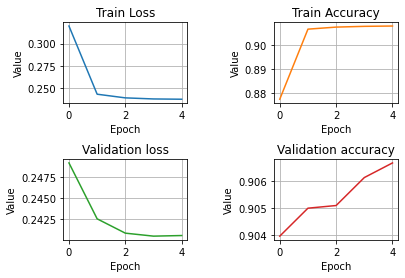

In [16]:
epochs = r.epoch
loss = r.history['loss']
acc = r.history['acc']
val_loss = r.history['val_loss']
val_acc = r.history['val_acc']

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.7, wspace=0.7)
axs[0, 0].plot(epochs, loss)
axs[0, 0].set_title('Train Loss')
axs[0, 0].grid()
axs[0, 1].plot(epochs, acc, 'tab:orange')
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].grid()
axs[1, 0].plot(epochs, val_loss, 'tab:green')
axs[1, 0].set_title('Validation loss')
axs[1, 0].grid()
axs[1, 1].plot(epochs, val_acc, 'tab:red')
axs[1, 1].set_title('Validation accuracy')
axs[1, 1].grid()

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Value')

We can see that all of the values change significantly during the first epoch (so called Elbow point), and only mildly after the first one. This means that the model gains a significant accuracy already during the first epoch and a low loss, meaning that the model is accuarate in predicting the correct choice. The lower the models loss is, the better the model is in predicting. Loss is defined as the difference between the predicted value by the model and the true value. For this reason we chose 5 epochs to optimize the runtime and accuracy/loss values of the model. For training, test and validation portions we achieved ~0.23 to ~0.24 loss value and ~0.9 accuracy (seen below).

These plots can be explained by the things that happen in the neural network during training. For each epoch the accuracy rises and the loss get lower since the parameters in the neurons get changed to more optimal values to predict the outcome. In the training section we defined the <code>BATCH_SIZE</code>-variable, which determines how many instances will be checked before changing the parameters in the neurons. The lower the batch size the more parameter changes will occur, but also the runtime gets a lot longer. We achieved really good accuracy and low loss with the current batch size of 128. An even lower amount of epochs would've sufficed, but we wanted to be more certain of the results.

In [9]:
print(f'Training loss = {loss[-1]:.3f}')
print(f'Training accuracy = {acc[-1]:.3f}')

Training loss = 0.238
Training accuracy = 0.908


In [10]:
print(f'Validation loss = {val_loss[-1]:.3f}')
print(f'Validation accuracy = {val_acc[-1]:.3f}')

Validation loss = 0.241
Validation accuracy = 0.907


In [11]:
test_loss, test_acc = model.evaluate(test_features, test_labels, verbose = 0)
print(f'Test loss = {test_loss:.3f}')
print(f'Test accuracy = {test_acc:.3f}')

Test loss = 0.235
Test accuracy = 0.908


### 7.1 Final Performance

In this section we use the test set (20 % of the orignal set) on the trained model and evaluate how well the model performed.  

We created a confusion matrix and a classification report, that display all of the final performance results of the model. The <code>THRESHOLD</code>-variable determines how accurate the prediction must be so that it will be taken into account in the final evaluation. In this case it must be at least 35 % accurate. The lower the threshhold is, the more data will be taken into account, but the data will be less accurate.

In [12]:
THRESHOLD = 0.35

predictions = model.predict(test_features)
pred_labels = 1.0 * (predictions >= THRESHOLD)
cm = confusion_matrix(test_labels, pred_labels)

tn, fp, fn, tp = confusion_matrix(test_labels, pred_labels).ravel()
print(f'              Confusion matrix      ')
print(f'                 Prediction         ')
print(f'Diagnose  Healthy   Disease      SUM')
print(f'Healthy  {tn:8d}  {fp:8d} {tn+fp:8d}')
print(f'Disease  {fn:8d}  {tp:8d} {fn+tp:8d}')
print(f'SUM      {tn+fn:8d}  {fp+tp:8d} {tn+fp+fn+tp:8d}')

              Confusion matrix      
                 Prediction         
Diagnose  Healthy   Disease      SUM
Healthy     43937      2027    45964
Disease      3174      1598     4772
SUM         47111      3625    50736


We also made a graph of the confusion matrix for clarity.

<AxesSubplot:>

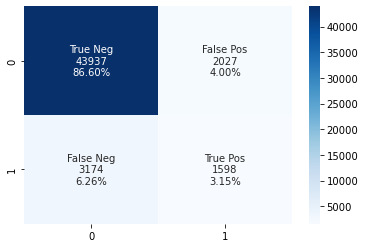

In [13]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

In [14]:
cr = classification_report(test_labels, pred_labels, target_names = ['Healthy', 'Disease'])
print(cr)

              precision    recall  f1-score   support

     Healthy       0.93      0.96      0.94     45964
     Disease       0.44      0.33      0.38      4772

    accuracy                           0.90     50736
   macro avg       0.69      0.65      0.66     50736
weighted avg       0.89      0.90      0.89     50736



In [15]:
print(f'Precision for Healthy = {tn/(tn+fn):.2f}')
print(f'Precision for Disease = {tp/(fp+tp):.2f}')
print(f'Sensitivity = {tp/(tp+fn):.2f}')
print(f'Specificity = {tn/(tn+fp):.2f}')

Precision for Healthy = 0.93
Precision for Disease = 0.44
Sensitivity = 0.33
Specificity = 0.96


The main objective in this model was to achieve a high sensitivity and specificity rate. With the trained model and test set we got a sensitivity rate of 33 % and a specifity rate of 96 %. Achieving high sensitivity will cause the precision of the diseased to drop significantly, so we needed to find a sweet spot for the sensitivity and precision. This was accomplished by tweaking the values of <code>THRESHOLD</code>, <code>BATCH_SIZE</code>, <code>EPOCHS</code>, hidden layers and neurons.

## 8. Discussion and conclusions

A few models were tested during this report, namely Sequential, Gaussian Naive-Bayes and Multinomial Naive-Bayes. Best results were performed by the Sequential model. The Gaussian Naive-Bayes and Multinomial Naive-Bayes models both produced an accuracy of 0.8, while the Sequential model produced above 0.9 accuracy.

We tested different settings to find the best, simplest and fastest way to get reasonably good results with the model. We started by changing the amount of neurons and hidden layers. Results didn't improve much by adding hidden layers so we decided to only use one hidden layer and tried to find the smallest amount for neurons. We tested with every amount of neurons from 5 to 1 and got almost the same results, except with 1 neuron where we got errors regarding dividing by zero. So we decided to use four neurons because to be sure no errors happen.

We continued by changing epochs and batch size. With higher epoch values, we didn't get any better results and the runtime was much longer than with lower epoch values. That is why we decided to try lower epoch values and with 5 epochs, we got the best results and the runtime was faster. We also tried changing batch size but we came to a conclusion that 128 was the best, because with lower values the runtime would suffer and with higher values the results were not any better.

Lastly, we changed the <code>THRESHOLD</code>-value to 0.35. We also tried with values ranging from 0.2 to 0.7. With this change, recall/sensitivity got much higher (from ~0.1 to ~0.3) and specificity only decreasing a little (from 0.99 to 0.96). With lower values, precision decreased too much and the model misclassified too many healthy cases. With higher values recall decreased too much and the model detected diseased poorly.

So we got the best model with the following settings using the Sequential model:

|Setting|Value|
|--|--|
|Neurons|4|
|Hidden layers|1|
|Epochs|5|
|Batch size|128|
|Threshold|0.35|

The model achieved a moderately good performance with our settings. The final performance results with these settings were as follows:

|Metric|Value|
|--|--|
|Sensitivity / Recall|0.33|
|Specificity|0.96|
|Accuracy|0.908|
|Loss|0.235|

### 8.1 Main observations and learning points

We came to the conlcusion that the Sequential model was the most accurate model with the settings specified in the table above.

We observed that for a dataset of this type a neural network with only one hidden layer with four neurons was enough. Increasing or decreasing the batch size from 128 didn't accomplish more accurate results either. For epochs, five was the most effective one relative to its runtime. That is to say we learned that neural networks don't need to be overly large and complex to achieve relatively good results. We learned to work with datasets using Python and various libraries, such as Pandas, Tensorflow, Seaborn and Scikit-learn.

### 8.2 Model improvements

We spent a lot of time tweaking the settings to find the best ones that achieve best results (accuracy, sensitivity, etc.). From the setting perspective we are unsure what would be the best thing to improve to get better results. 
